In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
X = torch.arange(-10, 10, 0.05).unsqueeze(dim=1)
y = X ** 3

In [3]:
X.shape, y.shape

(torch.Size([400, 1]), torch.Size([400, 1]))

In [4]:
X[:10], y[:10]

(tensor([[-10.0000],
         [ -9.9500],
         [ -9.9000],
         [ -9.8500],
         [ -9.8000],
         [ -9.7500],
         [ -9.7000],
         [ -9.6500],
         [ -9.6000],
         [ -9.5500]]),
 tensor([[-1000.0000],
         [ -985.0748],
         [ -970.2989],
         [ -955.6718],
         [ -941.1920],
         [ -926.8594],
         [ -912.6730],
         [ -898.6320],
         [ -884.7361],
         [ -870.9839]]))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([240, 1]),
 torch.Size([240, 1]),
 torch.Size([160, 1]),
 torch.Size([160, 1]))

In [6]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})
  plt.grid()

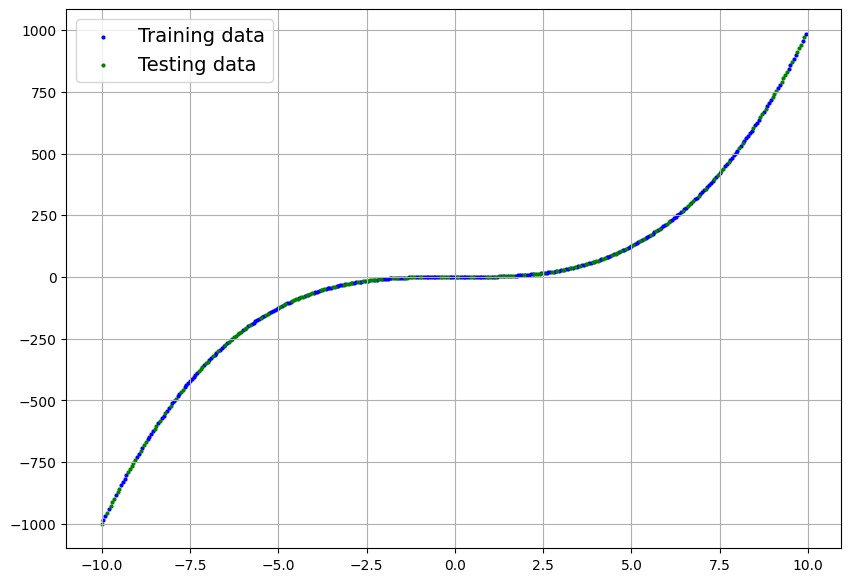

In [7]:
plot_predictions()

In [8]:
class TryNonLinearModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=1, out_features=10)
        self.relu = nn.ReLU()
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.relu = nn.ReLU()
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # <- add in ReLU activation function
        # Can also put sigmoid in the model 
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # Intersperse the ReLU activation function between layers
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

In [9]:
# Set manual seed since nn.Parameter are randomly initialzied
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = TryNonLinearModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([[ 0.7645],
         [ 0.8300],
         [-0.2343],
         [ 0.9186],
         [-0.2191],
         [ 0.2018],
         [-0.4869],
         [ 0.5873],
         [ 0.8815],
         [-0.7336]], requires_grad=True),
 Parameter containing:
 tensor([ 0.8692,  0.1872,  0.7388,  0.1354,  0.4822, -0.1412,  0.7709,  0.1478,
         -0.4668,  0.2549], requires_grad=True),
 Parameter containing:
 tensor([[-0.1457, -0.0371, -0.1284,  0.2098, -0.2496, -0.1458, -0.0893, -0.1901,
           0.0298, -0.3123],
         [ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
           0.0346, -0.0997],
         [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
           0.1606, -0.1927],
         [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1310,  0.1000, -0.0055,
           0.2475, -0.2247],
         [ 0.0199, -0.2158,  0.0975, -0.1089,  0.0969, -0.0659,  0.2623, -0.1874,
          -0.1886, -0.1886],
         [ 0.2844,  0.10

In [10]:
# List named parameters 
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.7645],
                      [ 0.8300],
                      [-0.2343],
                      [ 0.9186],
                      [-0.2191],
                      [ 0.2018],
                      [-0.4869],
                      [ 0.5873],
                      [ 0.8815],
                      [-0.7336]])),
             ('layer_1.bias',
              tensor([ 0.8692,  0.1872,  0.7388,  0.1354,  0.4822, -0.1412,  0.7709,  0.1478,
                      -0.4668,  0.2549])),
             ('layer_2.weight',
              tensor([[-0.1457, -0.0371, -0.1284,  0.2098, -0.2496, -0.1458, -0.0893, -0.1901,
                        0.0298, -0.3123],
                      [ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0

In [11]:
# Make predictions with model
with torch.inference_mode(): 
    y_preds = model_0(X_test)


# Check the predictions
print(f"Number of testing samples: {len(X_test)}") 
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 160
Number of predictions made: 160
Predicted values:
tensor([[ 7.3028e-04],
        [-2.9878e-01],
        [-6.8195e-01],
        [-1.0092e-03],
        [-4.3572e-01],
        [-4.7265e-01],
        [-4.9117e-01],
        [-4.3161e-01],
        [-2.2583e-01],
        [-3.0029e-01],
        [-7.8044e-01],
        [-6.0924e-01],
        [-5.8756e-01],
        [-5.2190e-01],
        [-2.7567e-01],
        [-6.4501e-01],
        [-2.8835e-01],
        [-6.6458e-01],
        [-6.4966e-02],
        [-6.9779e-01],
        [-5.0138e-01],
        [-7.5582e-01],
        [-7.1993e-01],
        [-2.5188e-01],
        [-8.1738e-01],
        [-7.3838e-01],
        [-3.4954e-01],
        [-4.1156e-02],
        [-2.0560e-01],
        [-3.9057e-01],
        [-7.3469e-01],
        [-1.9445e-02],
        [-2.0095e-01],
        [-5.8346e-01],
        [-6.9081e-02],
        [-3.4133e-01],
        [-3.5364e-01],
        [-5.3913e-01],
        [-1.7081e-01],
        [-2.3873e-01],

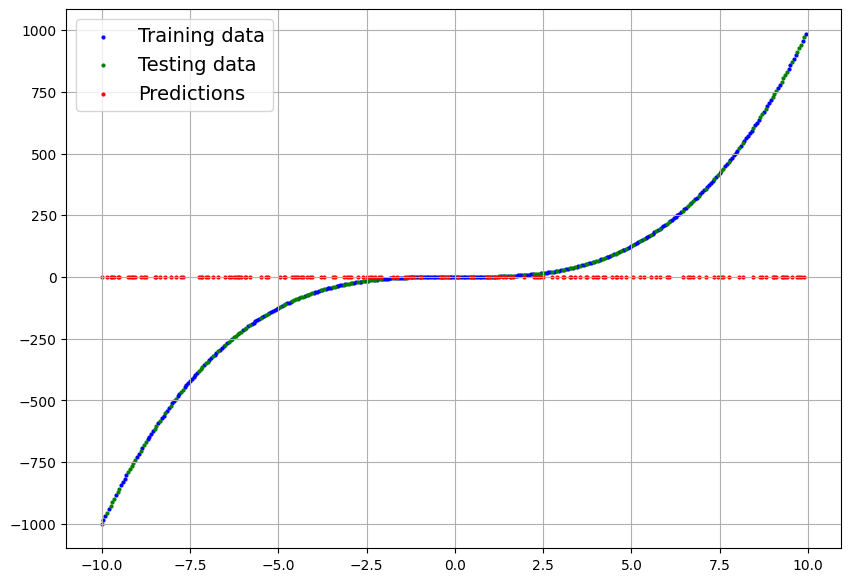

In [12]:
plot_predictions(predictions=y_preds)

In [13]:
# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.01) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lo

In [14]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 10000

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside 
    y_pred = model_0(X_train)


    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 233.20657348632812 | MAE Test Loss: 275.08599853515625 
Epoch: 10 | MAE Train Loss: 232.58282470703125 | MAE Test Loss: 274.4228820800781 
Epoch: 20 | MAE Train Loss: 231.55030822753906 | MAE Test Loss: 273.26751708984375 
Epoch: 30 | MAE Train Loss: 229.3137664794922 | MAE Test Loss: 270.6780700683594 
Epoch: 40 | MAE Train Loss: 223.10903930664062 | MAE Test Loss: 263.5482482910156 
Epoch: 50 | MAE Train Loss: 203.74693298339844 | MAE Test Loss: 241.35867309570312 
Epoch: 60 | MAE Train Loss: 160.6398468017578 | MAE Test Loss: 197.98382568359375 
Epoch: 70 | MAE Train Loss: 132.8574981689453 | MAE Test Loss: 162.1334686279297 
Epoch: 80 | MAE Train Loss: 118.90424346923828 | MAE Test Loss: 144.13507080078125 
Epoch: 90 | MAE Train Loss: 116.71766662597656 | MAE Test Loss: 141.9418182373047 
Epoch: 100 | MAE Train Loss: 115.26112365722656 | MAE Test Loss: 140.41688537597656 
Epoch: 110 | MAE Train Loss: 113.7553939819336 | MAE Test Loss: 138.9216766357422 
E

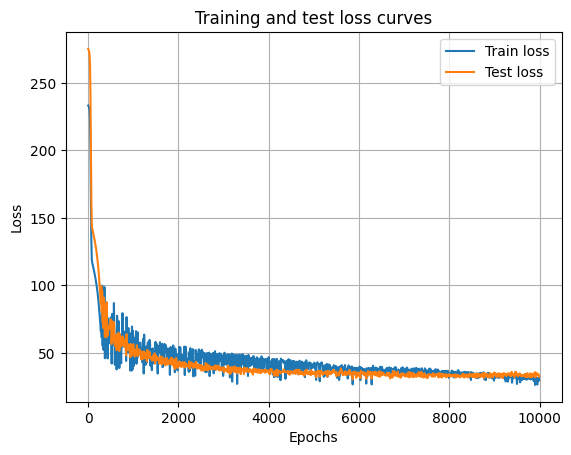

In [15]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.grid()

In [16]:
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())

The model learned the following values for weights and bias:
OrderedDict([('layer_1.weight', tensor([[ 1.2508],
        [ 2.5410],
        [-2.5105],
        [ 4.2229],
        [-2.3111],
        [ 1.6662],
        [-4.9988],
        [ 3.0545],
        [ 5.0166],
        [-4.4111]])), ('layer_1.bias', tensor([ -1.8414,  -8.1087,  -8.2015, -20.0058,  -3.7385, -10.2185, -20.5791,
        -12.6698, -22.9800, -24.7657])), ('layer_2.weight', tensor([[-1.4570e-01, -3.7085e-02, -1.2844e-01,  2.0978e-01, -2.4962e-01,
         -1.4578e-01, -8.9295e-02, -1.9014e-01,  2.9847e-02, -3.1233e-01],
        [ 2.6085e+00,  1.6964e+00,  2.0164e-01,  1.0183e+00, -1.8401e-01,
          7.2212e-01, -5.9945e-03,  1.5701e+00,  1.4987e+00, -1.6651e-01],
        [ 3.1628e-01, -5.8004e-01,  9.0003e-01, -5.7866e-02,  1.5770e+00,
         -4.2898e-01,  1.2965e+00, -1.7621e-01, -5.2842e-01,  1.2294e+00],
        [-4.4421e+00, -4.5855e-01, -2.5227e-01,  3.4746e+00,  8.7859e-02,
          1.2736e+00,  9.7184e-02,  1.

In [17]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model_0(X_test)
y_preds

tensor([[-1.5961e-02],
        [ 6.9358e+01],
        [-6.8201e+02],
        [-1.5961e-02],
        [-1.7403e+02],
        [-2.2902e+02],
        [ 3.2277e+02],
        [-1.6967e+02],
        [ 3.7461e+01],
        [-5.3337e+01],
        [-8.9533e+02],
        [ 6.1391e+02],
        [-4.7757e+02],
        [-3.3535e+02],
        [-4.2258e+01],
        [-6.0201e+02],
        [ 6.4801e+01],
        [ 7.5039e+02],
        [ 1.4808e+00],
        [ 8.3227e+02],
        [-2.9091e+02],
        [-8.4200e+02],
        [ 8.8686e+02],
        [ 4.8853e+01],
        [-9.7533e+02],
        [ 9.3235e+02],
        [-8.4318e+01],
        [-1.5961e-02],
        [ 3.0779e+01],
        [-1.2687e+02],
        [ 9.2325e+02],
        [-1.5961e-02],
        [ 2.9834e+01],
        [-4.6868e+02],
        [ 2.4259e+00],
        [-7.5808e+01],
        [-8.8573e+01],
        [ 4.4105e+02],
        [-1.2183e+01],
        [-3.0509e+01],
        [ 7.9588e+02],
        [-4.8646e+02],
        [-2.9979e+02],
        [-7

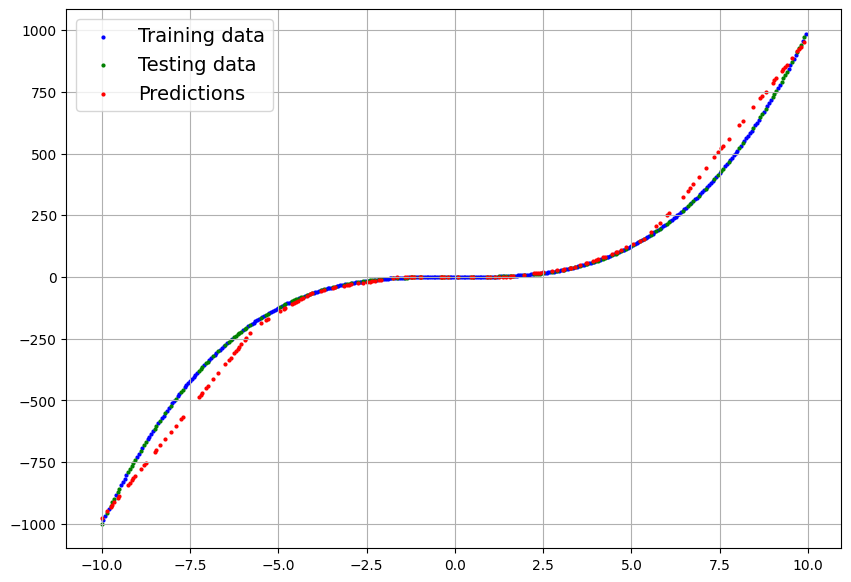

In [18]:
plot_predictions(predictions=y_preds)

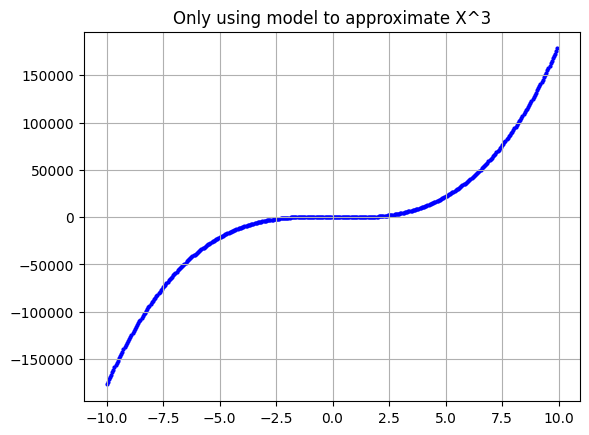

In [19]:
plt.title("Only using model to approximate X^3")
plt.scatter(X, model_0(y).detach().numpy(), c="b", s=4, label="Predictions")
plt.grid()